# Introduction

This tutorial will show you how to create an MLPClassifier using Scikit-learn to classify handwritten digits from the MNIST dataset. We will also visualize the weights of the first layer of the MLP to gain insight into the learning behavior.

# Import Libraries

We will start by importing the necessary libraries for this project.

In [1]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load Data

Next, we will load the MNIST dataset using Scikit-learn's **fetch_openml** function.

In [2]:
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

# Preprocess Data

We will normalize the data by dividing each pixel value by 255.0, which is the maximum pixel value.

In [3]:
X = X / 255.0

# Split Data

We will split the dataset into a training set and a test set using the **train_test_split** function.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

# Train MLPClassifier

We will create an MLPClassifier with a single hidden layer containing 40 neurons. We will train the MLP for only 8 iterations due to resource constraints. We will also catch the **ConvergenceWarning** that will be thrown because the model won't converge within the limited number of iterations.

In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver='sgd',
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985


# Evaluate the Model

We will evaluate the MLPClassifier by computing its accuracy on the training and test sets.

In [6]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.986429
Test set score: 0.953061


# Visualize Weights

Finally, we will visualize the weights of the first layer of the MLP. We will create a 4x4 grid of subplots and display each weight as a 28x28 pixel grayscale image.

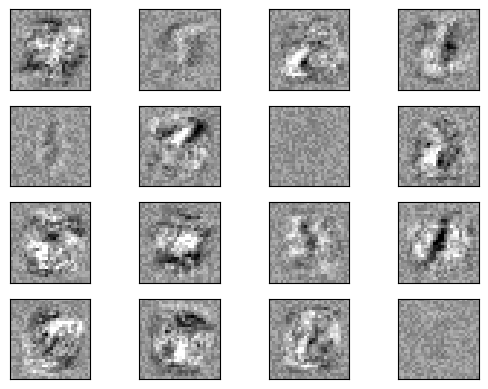

In [7]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# Summary

In this tutorial, we learned how to create an MLPClassifier using Scikit-learn to classify handwritten digits from the MNIST dataset. We also visualized the weights of the first layer of the MLP to gain insight into the learning behavior.